In [298]:
#Antonio Muniz    22.119.001 - 0
#Erik Fernando    22.119.074 - 7
#Henrique Caralho 22.119.078 - 8

In [299]:
#Passo 1 - Definir Database

In [300]:
from scipy.stats import shapiro
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets

df = pd.read_csv('data/concrete_data.csv')

In [301]:
#Passo 2 - Limpar Database

In [302]:
#exibir valores ausentes ou null
df.isnull().sum().sort_values(ascending=False)[:10]
print("Número de linhas e colunas:", df.shape)
attributes = list(df.columns)
#removendo valores nulos
df.dropna()

#preencher os nulos
df.fillna(df.mean(0))

#remover duplicados
df.drop_duplicates()
df.head(25)

Número de linhas e colunas: (1030, 9)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [303]:
#Passo 3 - Definir x e y

In [304]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(x)
print(y)

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]
[79.99 61.89 40.27 ... 23.7  32.77 32.4 ]


In [305]:
#Passo 4 - Média

In [306]:
averageX = np.mean(x) 
averageY = np.mean(y) 

print("Média de x: " + str(averageX)) #calcula a média de x
print("Média de y: " + str(averageY))  #calcula a média de y

Média de x: 298.6481917475728
Média de y: 35.817961165048544


In [307]:
#Passo 5 - Variância

In [308]:
varianceX = np.var(x) 
varianceY = np.var(y) 

print("Variância de x: " + str(varianceX))
print("Variância de y: " + str(varianceY)) 

Variância de x: 124174.2081423613
Variância de y: 278.81086128004523


In [309]:
#Passo 6 - Desvio Padrão

In [310]:
deviationX = np.std(x)
deviationY = np.std(y)

print("Desvio Padrão de x: " + str(deviationX)) #calcula o desvio padrão de x
print("Desvio Padrão de y: " + str(deviationY)) #calcula o desvio padrão de y  

Desvio Padrão de x: 352.3836093554314
Desvio Padrão de y: 16.697630409134263


In [311]:
#Passo 7 - Mediana

In [312]:
medianX = np.median(x)
medianY = np.median(y)

print("Mediana de x: " + str(medianX)) #calcula o desvio padrão de x
print("Mediana de y: " + str(medianY)) #calcula o desvio padrão de y    

Mediana de x: 162.0
Mediana de y: 34.445


In [313]:
#Passo 8 - Histograma

In [314]:
# Histograma de x

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]


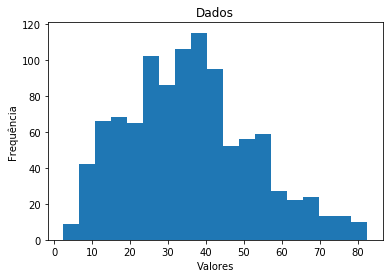

In [315]:
h = np.histogram(x, bins = 'auto') #calcula o histograma
print(x)
plt.hist(y, bins = 'auto')
plt.title('Dados')
plt.ylabel('Frequência')
plt.xlabel('Valores')
plt.show()

In [316]:
# Histograma de y

(array([  9,  42,  66,  68,  65, 102,  86, 106, 115,  95,  52,  56,  59,
        27,  22,  24,  13,  13,  10]), array([ 2.33      ,  6.55473684, 10.77947368, 15.00421053, 19.22894737,
       23.45368421, 27.67842105, 31.90315789, 36.12789474, 40.35263158,
       44.57736842, 48.80210526, 53.02684211, 57.25157895, 61.47631579,
       65.70105263, 69.92578947, 74.15052632, 78.37526316, 82.6       ]))


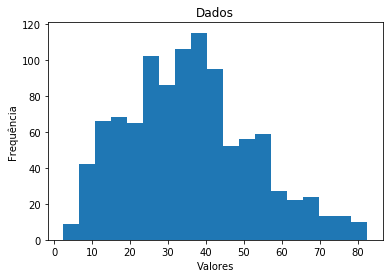

In [317]:
h = np.histogram(y, bins = 'auto') #calcula o histograma
print(h)
plt.hist(y, bins = 'auto')
plt.title('Dados')
plt.ylabel('Frequência')
plt.xlabel('Valores')
plt.show()

In [318]:
#Passo 9 - Coeficiente de Correlação

In [320]:
#correlacao = np.corrcoef(x, y)
#print(correlacao)

print('\n\n\n\nPearson')
print(df.corr(method='pearson'))





Pearson
                                 cement  blast_furnace_slag   fly_ash  \
cement                         1.000000           -0.275216 -0.397467   
blast_furnace_slag            -0.275216            1.000000 -0.323580   
fly_ash                       -0.397467           -0.323580  1.000000   
water                         -0.081587            0.107252 -0.256984   
superplasticizer               0.092386            0.043270  0.377503   
coarse_aggregate              -0.109349           -0.283999 -0.009961   
fine_aggregate                -0.222718           -0.281603  0.079108   
age                            0.081946           -0.044246 -0.154371   
concrete_compressive_strength  0.497832            0.134829 -0.105755   

                                  water  superplasticizer  coarse_aggregate  \
cement                        -0.081587          0.092386         -0.109349   
blast_furnace_slag             0.107252          0.043270         -0.283999   
fly_ash             

In [321]:
#Passo 10 - Teste de Normalidade

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.780, p=0.000
Amostra não Gausssiana (rejeita H0)


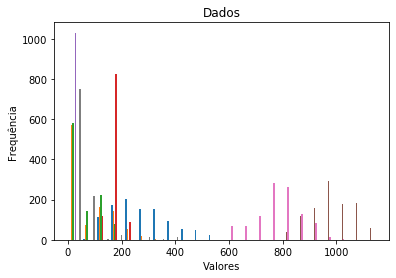

In [322]:
from scipy.stats import shapiro
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets


# Analisar se a coluna sepal.length tem distribuição normal

# normalidade test
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretação
alpha = 0.05
if p > alpha:
    print('Amostra Gaussiana (aceita H0)')
else:
    print('Amostra não Gausssiana (rejeita H0)')
# Verificação atrav´s do histograma
plt.hist(x, bins='auto')
plt.title('Dados')
plt.ylabel('Frequência')
plt.xlabel('Valores')
plt.show()

Statistics=0.980, p=0.000
Amostra não Gausssiana (rejeita H0)


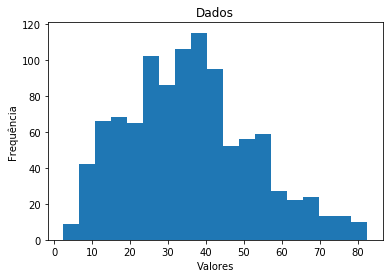

In [323]:

# Analisar se a coluna sepal.length tem distribuição normal

# normalidade test
stat, p = shapiro(y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretação
alpha = 0.05
if p > alpha:
    print('Amostra Gaussiana (aceita H0)')
else:
    print('Amostra não Gausssiana (rejeita H0)')
# Verificação atrav´s do histograma
plt.hist(y, bins='auto')
plt.title('Dados')
plt.ylabel('Frequência')
plt.xlabel('Valores')
plt.show()